In [1]:
#mnist
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
initializer0 = keras.initializers. RandomUniform(minval = -1, maxval =2)
initializer1 = keras.initializers. RandomUniform(minval = -1, maxval =2)

class Adaact(keras.layers.Layer):
    def __init__(self):
        super(Adaact, self).__init__()
        self.k0 = self.add_weight(name='k0', shape = (), initializer=initializer0, trainable=True)
        self.k1 = self.add_weight(name='k1', shape = (), initializer=initializer1, trainable=True)
        
    def call(self, inputs):
        return self.k0 + tf.multiply(inputs, self.k1)

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, kernel_size=(3, 3))(inputs)
adaact = Adaact()
x = adaact(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3))(x)
x = adaact(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_adaact")
model.summary()

Model: "mnist_adaact"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 adaact (Adaact)                multiple             2           ['conv2d[0][0]',                 
                                                                  'conv2d_1[0][0]']               
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['adaact[0][0]']      

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 39s 89ms/step - loss: 0.8087 - accuracy: 0.7358 - val_loss: 0.1922 - val_accuracy: 0.9463
Epoch 2/15
422/422 [==============================] - 43s 102ms/step - loss: 0.2315 - accuracy: 0.9311 - val_loss: 0.1085 - val_accuracy: 0.9720
Epoch 3/15
422/422 [==============================] - 43s 103ms/step - loss: 0.1555 - accuracy: 0.9536 - val_loss: 0.0840 - val_accuracy: 0.9775
Epoch 4/15
422/422 [==============================] - 42s 101ms/step - loss: 0.1204 - accuracy: 0.9632 - val_loss: 0.0679 - val_accuracy: 0.9820
Epoch 5/15
422/422 [==============================] - 44s 104ms/step - loss: 0.1006 - accuracy: 0.9700 - val_loss: 0.0632 - val_accuracy: 0.9812
Epoch 6/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0886 - accuracy: 0.9726 - val_loss: 0.0594 - val_accuracy: 0.9835
Epoch 7/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0828 - accuracy: 0.9746 - val_loss: 0.0540 - val_accur

In [7]:
# final parameter values at the end of training
final_parameter_values = model.get_weights()
print(final_parameter_values)

[array([[[[ 0.04614351, -0.15337645, -0.44417503, -0.2000727 ,
          -0.26007727,  0.11292941,  0.01798262,  0.03965599,
           0.28032154,  0.11859091, -0.3575191 ,  0.2776683 ,
          -0.17147294,  0.2076609 ,  0.03140024,  0.09550359,
          -0.42471477,  0.03436588, -0.13722982,  0.11369082,
           0.19740145,  0.15212624, -0.11498109,  0.12352782,
           0.18642916, -0.07347155,  0.22125684,  0.25303644,
          -0.00639412, -0.6722644 , -0.22953983,  0.0271335 ]],

        [[ 0.04852657, -0.18963152, -0.01036845,  0.06030878,
           0.17510045,  0.28780097,  0.08642269, -0.00350201,
          -0.00936299,  0.5210316 , -0.05245963,  0.13669091,
          -0.3070349 ,  0.28979173,  0.00813776,  0.13592531,
          -0.3675191 ,  0.05879624, -0.4435545 , -0.17015411,
           0.06386069,  0.02780399,  0.18246576, -0.19863288,
          -0.26386392,  0.08456507,  0.11507017, -0.12218728,
           0.03072133, -0.42818567, -0.12996396, -0.16385145]],

 

In [8]:
print("AF coefficients (weights) {}".format(adaact.get_weights()))

AF coefficients (weights) [0.08780917, -0.83886194]


In [9]:
# Obtain test loss and test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.038563963025808334
Test accuracy: 0.9871000051498413


In [10]:
score = model.evaluate(x_train, y_train, verbose=0)
print("train loss:", score[0])
print("train accuracy:", score[1])

train loss: 0.029655851423740387
train accuracy: 0.9916166663169861


In [11]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 8ms/step


In [12]:
f1 = f1_score(y_true, y_pred, average='weighted')
print("f1 score is {}".format(f1))

f1 score is 0.987096857315104


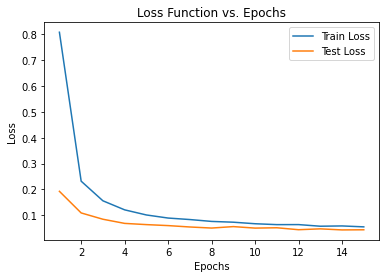

In [13]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(range(1, epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, epochs+1), test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs. Epochs')
plt.legend()
plt.show()